In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow
import matplotlib.pyplot as plt

In [ ]:
train = '/content/drive/MyDrive/cell_images/cell_images/train'
test = '/content/drive/MyDrive/cell_images/cell_images/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 12479 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


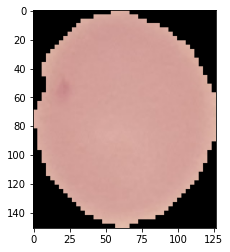

In [ ]:
unifected_cell_path = train+'/uninfected/'+os.listdir(train+'/uninfected')[0]
unifected_cell = plt.imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [ ]:
len(os.listdir(train+'/parasitized'))
len(os.listdir(train+'/uninfected'))

12480

In [ ]:
image_shape = (130,130,3)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

In [ ]:
image_gen.flow_from_directory(train)

Found 34902 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test)

Found 2600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 34902 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,steps_per_epoch=10,
                             callbacks=[early_stop])

Epoch 1/20
10/10 [==============================] - 346s 38s/step - loss: 0.6755 - accuracy: 0.6313 - val_loss: 0.7296 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 65s 7s/step - loss: 0.6815 - accuracy: 0.5875 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 62s 7s/step - loss: 0.6479 - accuracy: 0.6625 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 65s 7s/step - loss: 0.6111 - accuracy: 0.6938 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 61s 7s/step - loss: 0.5988 - accuracy: 0.6250 - val_loss: 0.5954 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 64s 7s/step - loss: 0.5605 - accuracy: 0.6500 - val_loss: 0.5453 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 63s 7s/step - loss: 0.4770 - accuracy: 0.7375 - val_loss: 0.5568 - val_accuracy: 0.5000
Epoch 8/20
10/10 [

In [ ]:
print(model.evaluate(x=testing_set))

217/217 [==============================] - 27s 126ms/step - loss: 0.4502 - accuracy: 0.8277
[0.4501744210720062, 0.8276923298835754]
